<a href="https://colab.research.google.com/github/tarasi0/Python_Shevchenko/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D0%BE_Python_%D0%A8%D0%B5%D0%B2%D1%87%D0%B5%D0%BD%D0%BA%D0%BE_%D0%BA%D0%BE%D1%80%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math
import scipy.stats as st

**1. Загрузите файл HR.csv в pandas dataframe**

In [4]:
data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)**

In [ ]:
df_q = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]

In [ ]:
min_ = df_q.min()
max_ = df_q.max()
mean = df_q.mean()
median = df_q.median()
iqr = df_q.quantile(0.75) - df_q.quantile(0.25)
mode = df_q.mode().iloc[0]

print(f"min:", min_, f"max:", max_, f"mean:", mean, f"median:", median, f"iqr:", iqr,
      f"mode:", mode, sep='\n')

min:
satisfaction_level       0.09
last_evaluation          0.36
number_project           2.00
average_montly_hours    96.00
time_spend_company       2.00
dtype: float64
max:
satisfaction_level        1.0
last_evaluation           1.0
number_project            7.0
average_montly_hours    310.0
time_spend_company       10.0
dtype: float64
mean:
satisfaction_level        0.612834
last_evaluation           0.716102
number_project            3.803054
average_montly_hours    201.050337
time_spend_company        3.498233
dtype: float64
median:
satisfaction_level        0.64
last_evaluation           0.72
number_project            4.00
average_montly_hours    200.00
time_spend_company        3.00
dtype: float64
iqr:
satisfaction_level       0.38
last_evaluation          0.31
number_project           2.00
average_montly_hours    89.00
time_spend_company       1.00
dtype: float64
mode:
satisfaction_level        0.10
last_evaluation           0.55
number_project            4.00
average_montly_ho

In [ ]:
df_q.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


**3. Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.**

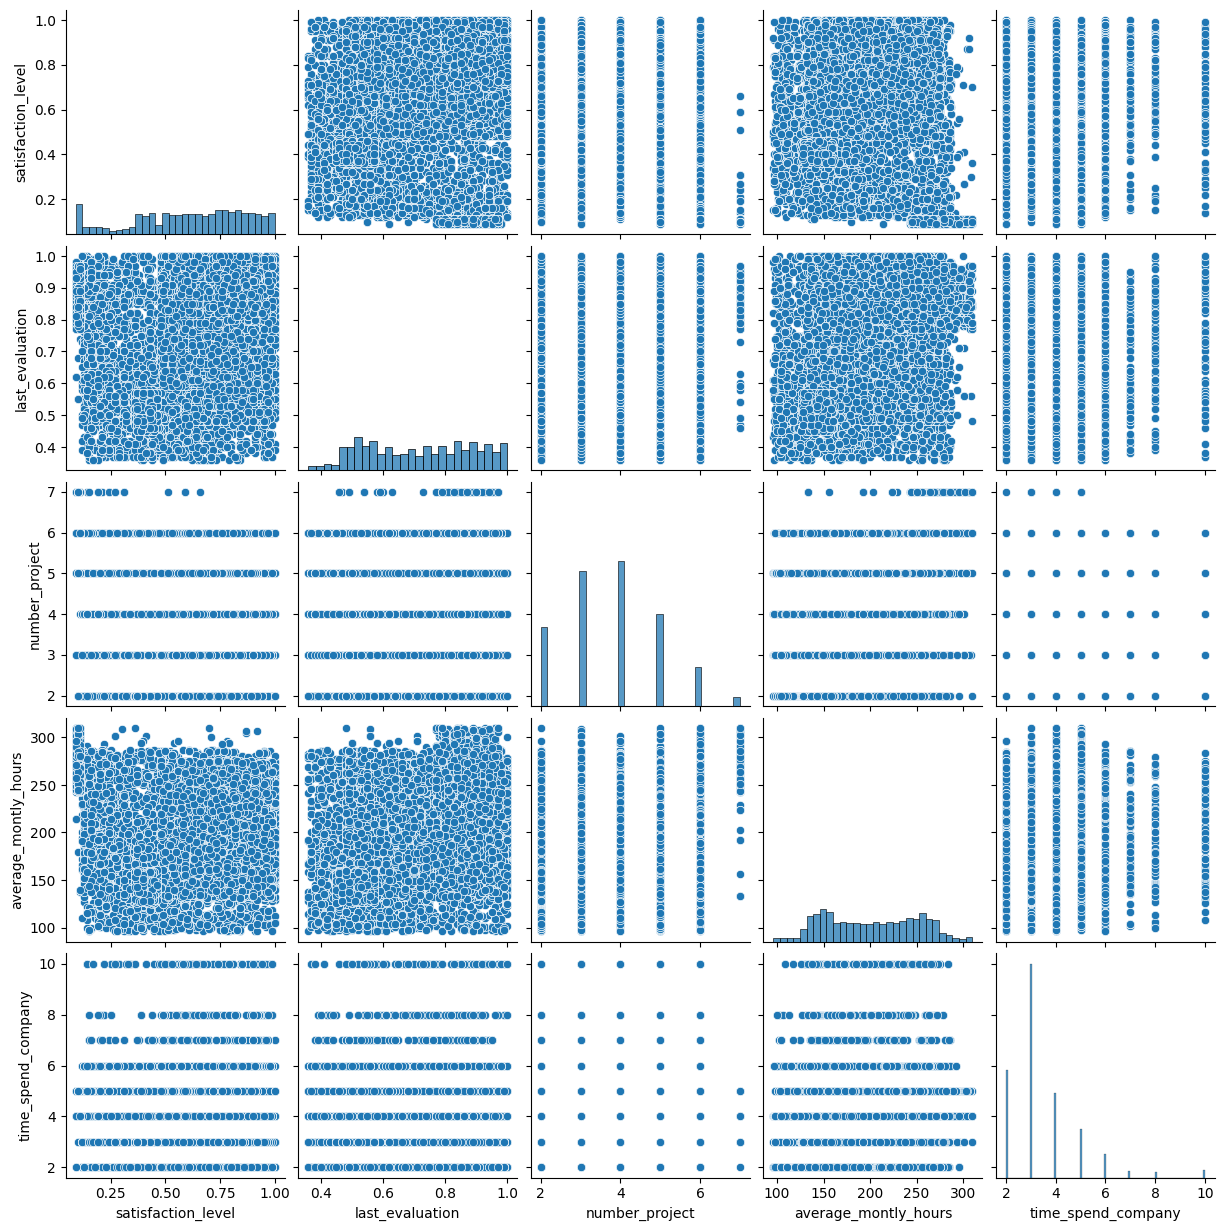

In [ ]:
sns.pairplot(df_q)

In [ ]:
df_qr = df_q.corr()
df_qr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


<Axes: >

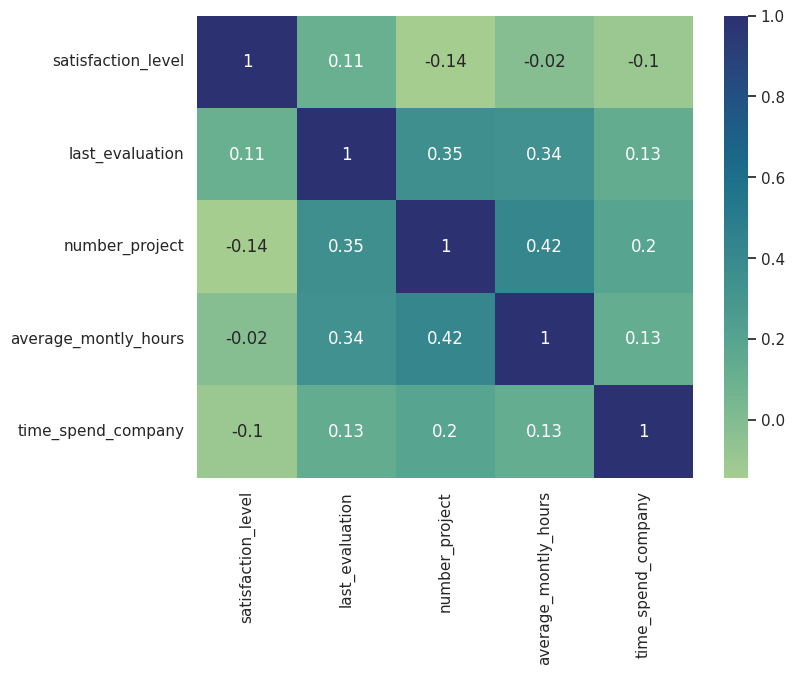

In [ ]:
sns.set(rc={'figure.figsize':(8, 6)})
sns.heatmap(df_q.corr(), annot=True, cmap='crest')

Две самые скоррелированные - number_project и average_montly_hours (0.42)

Две наименее скоррелированные переменные - satisfaction_level и average_montly_hours (-0.02)

**4. Рассчитайте сколько сотрудников работает в каждом
департаменте**

In [8]:
# мой вариант
df_sr = data.groupby('department').count().sort_values('satisfaction_level', ascending=False)
df_sr['satisfaction_level']

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: satisfaction_level, dtype: int64

In [9]:
# вариант эксперта
df_sr = data['department'].value_counts()
df_sr

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

**5. Показать распределение сотрудников по зарплатам**

In [ ]:
df_sra = data.groupby('salary').count()
df_sra['%'] = round((df_sra['satisfaction_level'] / data['satisfaction_level'].count()) * 100)
df_sra['%']

salary
high       8.0
low       49.0
medium    43.0
Name: %, dtype: float64

<Axes: title={'center': 'Распределение сотрудников по зарплатам'}, ylabel='%'>

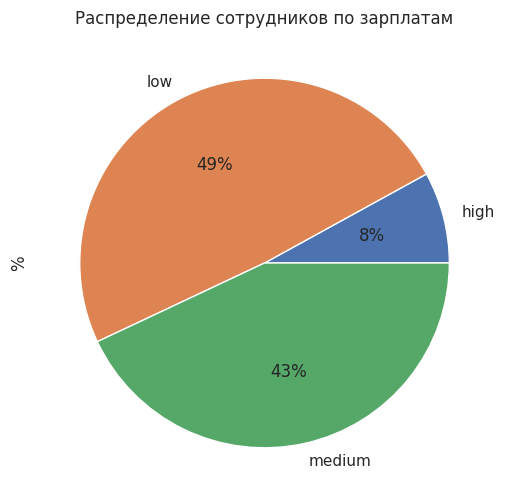

In [ ]:
df_sra['%'].plot(kind='pie', title='Распределение сотрудников по зарплатам', autopct='%1.0f%%')

**6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности**

In [ ]:
df_srad = data.groupby(['department','salary']).count()
df_srad['%'] = round((df_srad['satisfaction_level'] / data.groupby('department')['satisfaction_level'].count()) * 100, 2)
df_ = df_srad[['%']]
df_

%
department  salary       
IT          high     6.76
            low     49.63
            medium  43.60
RandD       high     6.48
            low     46.25
            medium  47.27
accounting  high     9.65
            low     46.68
            medium  43.68
hr          high     6.09
            low     45.33
            medium  48.58
management  high    35.71
            low     28.57
            medium  35.71
marketing   high     9.32
            low     46.85
            medium  43.82
product_mng high     7.54
            low     50.00
            medium  42.46
sales       high     6.50
            low     50.70
            medium  42.80
support     high     6.33
            low     51.41
            medium  42.26
technical   high     7.39
            low     50.44
            medium  42.17

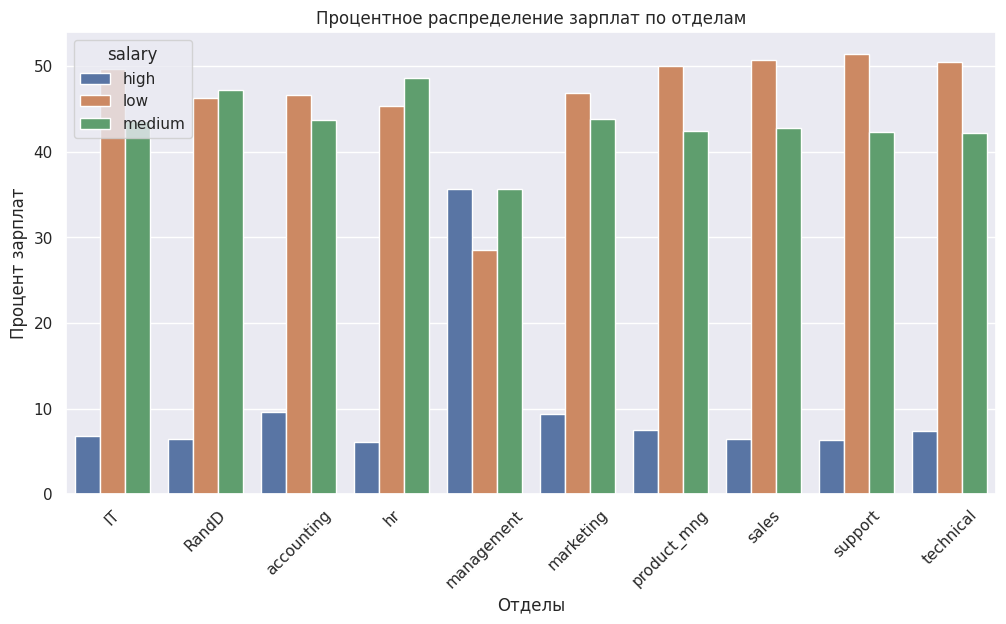

In [ ]:
# Преобразуем MultiIndex в столбцы
data_reset = df_.reset_index()

# Строим график
plt.figure(figsize=(12, 6))
sns.barplot(data=data_reset, x='department', y='%', hue='salary')
plt.title('Процентное распределение зарплат по отделам')
plt.xlabel('Отделы')
plt.ylabel('Процент зарплат')
plt.xticks(rotation=45)
plt.show()

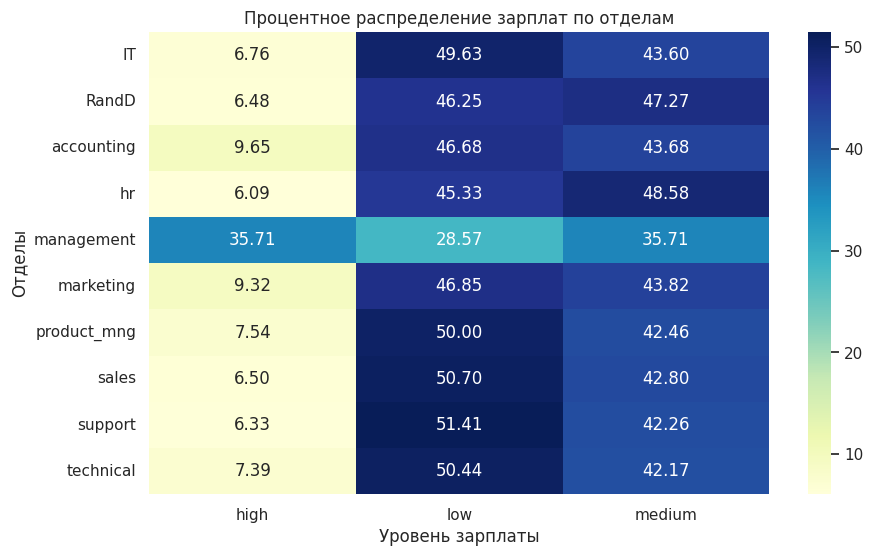

In [ ]:
# Создаем сводную таблицу для удобства построения тепловой карты
pivot_data = data_reset.pivot(index='department', columns='salary', values='%')

# Строим тепловую карту
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Процентное распределение зарплат по отделам')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Отделы')
plt.show()

**7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом**


In [ ]:
df_h = data[data['salary'] == 'high']
df_ha = df_h[['average_montly_hours']]
df_ha

,average_montly_hours
72,149
111,289
189,156
267,129
306,149
...,...
14829,148
14868,130
14902,159
14941,131


In [ ]:
df_l = data[data['salary'] == 'low']
df_la = df_l[['average_montly_hours']]
df_la

,average_montly_hours
0,157
3,223
4,159
5,153
6,247
...,...
14994,151
14995,160
14996,143
14997,280


In [ ]:
# Тест Стьюдента для двух выборок
stat, p = st.ttest_ind(df_ha['average_montly_hours'], df_la['average_montly_hours'], alternative='greater')

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

print('Результат:')
if p < 0.05:
    print('Среднее значение average_montly_hours у сотрудников с высоким окладом статистически больше среднего значения сотрудников с низким окладом')
else:
    print('Среднее значение average_montly_hours у сотрудников с высоким окладом статистически меньше среднего значения сотрудников с низким окладом')

Статистика = -0.72887, p = 0.7669488261
Результат:
Среднее значение average_montly_hours у сотрудников с высоким окладом статистически меньше среднего значения сотрудников с низким окладом


In [ ]:
result = pd.concat([df_ha['average_montly_hours'], df_la['average_montly_hours']], axis=1)
result.columns = ['average_montly_hours_high', 'Ataverage_montly_hourstack_rock_low']

<Axes: >

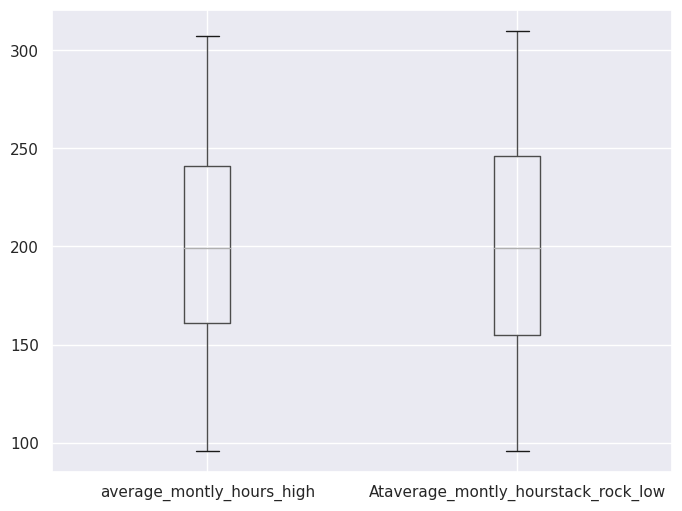

In [ ]:
result.boxplot()

In [ ]:
print(f"average_montly_hours_high средняя = {df_ha['average_montly_hours'].mean()}")
print(f"Ataverage_montly_hourstack_rock_low средняя = {df_la['average_montly_hours'].mean()}")

average_montly_hours_high средняя = 199.86742118027485
Ataverage_montly_hourstack_rock_low средняя = 200.9965828321487


In [ ]:
stat, p = st.ttest_ind(df_ha['average_montly_hours'], df_la['average_montly_hours'])

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

print('Результат:')
if p < 0.05:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')
else:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')

Статистика = -0.72887, p = 0.4661023478
Результат:
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


Вывод: сотрудники с высоким окладом проводят на работе меньше или одинаково времени, чем сотрудники с низким окладом

**8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):**

● Доля сотрудников с повышением за последние 5 лет

● Средняя степень удовлетворенности

● Среднее количество проектов

In [ ]:
df_le = data[data['left'] == 1]

In [ ]:
df_les = df_le.groupby('promotion_last_5years').count()

In [ ]:
df_les['%'] = (df_les['satisfaction_level'] / df_le['satisfaction_level'].count()) * 100
df_les['%']

promotion_last_5years
0    99.467936
1     0.532064
Name: %, dtype: float64

In [ ]:
df_nle = data[data['left'] == 0]

In [ ]:
df_nles = df_nle.groupby('promotion_last_5years').count()

In [ ]:
df_nles['%'] = (df_nles['satisfaction_level'] / df_nle['satisfaction_level'].count()) * 100
df_nles['%']

promotion_last_5years
0    97.374869
1     2.625131
Name: %, dtype: float64

Вывод: среди уволенных с повышением 0,5%, среди работающих 2,6%

In [ ]:
df_le['satisfaction_level'].mean()

0.4400980117614114

In [ ]:
df_nle['satisfaction_level'].mean()

0.666809590479524

Вывод: среди уволенных Средняя степень удовлетворенности = 0.44, среди работающих 0.66

In [ ]:
df_le['number_project'].mean()

3.8555026603192384

In [ ]:
df_nle['number_project'].mean()

3.786664333216661

Вывод: среди уволенных Среднее количество проектов = 3.86, среди работающих 3.79

**9. Разделить данные на тестовую и обучающую выборки Построить модель LDA,предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки**

In [ ]:
df_lna = data.iloc [:, [0,1,2,3,4,5,7]]
df_lna

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0
14995,0.37,0.48,2,160,3,0,0
14996,0.37,0.53,2,143,3,0,0
14997,0.11,0.96,6,280,4,0,0


In [ ]:
X = df_lna
y = data['left']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
lm = LogisticRegression()

In [ ]:
lm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lm.coef_

array([[-4.10168281,  0.71298578, -0.29219322,  0.0044665 ,  0.22049446,
        -1.44430083, -1.52833455]])

In [ ]:
lm.intercept_

array([0.17556791])

In [ ]:
y_pred = lm.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
y_test

6723     0
6473     0
4679     0
862      1
7286     0
        ..
10371    0
12541    1
2656     0
6759     0
13564    0
Name: left, Length: 3750, dtype: int64

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7584


Вывод: точность составила 76 %